In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('bus_data.csv')

In [3]:
df['SITR'] = df['dwell_time'] / df['travel_time']

In [4]:
ninety_percentile = df['travel_time'].quantile(0.9)
df['excess_travel_time'] = df['travel_time'] - ninety_percentile

In [5]:
df['excess_travel_time'] = df['excess_travel_time'].apply(lambda x: 0 if x < 0 else x)
df = df.loc[df['SITR']<1]

In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
grouped_df = df.groupby('deviceid').mean().reset_index()

grouped_df = grouped_df.round(2)

In [8]:
preprocessed_data = grouped_df.drop('deviceid',axis=1)

In [9]:
preprocessed_data

,travel_time,dwell_time,SITR,excess_travel_time
0,46.30,5.61,0.11,0.63
1,50.59,6.16,0.12,0.64
2,51.22,7.85,0.12,6.17
3,49.09,8.02,0.13,2.79
4,46.54,6.14,0.13,0.21
5,48.13,6.87,0.14,0.57
6,47.48,5.96,0.12,0.30
7,49.56,9.21,0.14,3.87
8,45.91,5.41,0.11,0.32
9,47.32,6.00,0.12,0.22


In [10]:
preprocessed_data.dtypes

travel_time           float64
dwell_time            float64
SITR                  float64
excess_travel_time    float64
dtype: object

C:\Users\ladca\AppData\Local\Temp\ipykernel_10076\1187143209.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data[feature], bins=20)
C:\Users\ladca\AppData\Local\Temp\ipykernel_10076\1187143209.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data[feature], bin

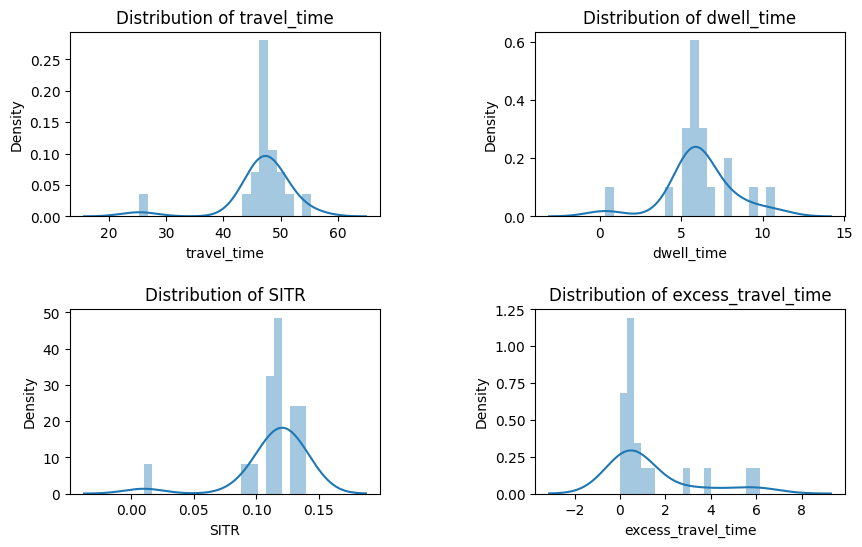

In [11]:
n_features = len(preprocessed_data.columns)
n_cols = 2  # Number of columns in the subplot grid (2 for two plots in a row)
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(1, figsize=(10, 6))

for i, feature in enumerate(preprocessed_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(preprocessed_data[feature], bins=20)
    plt.title(f'Distribution of {feature}')

plt.show()

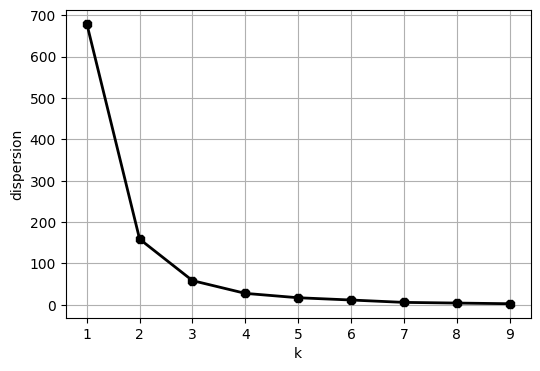

In [12]:
X1 = preprocessed_data.loc[:,['travel_time','dwell_time']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color='black', marker='8')
plt.xlabel('k')
plt.ylabel("dispersion")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X1)

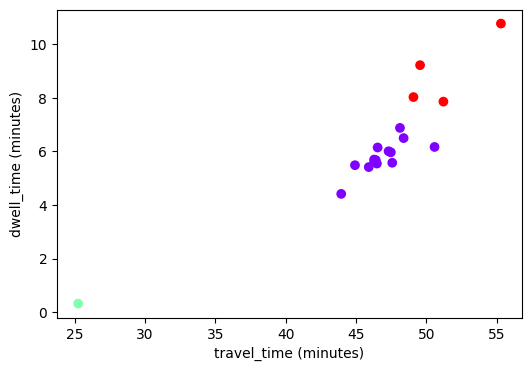

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('travel_time (minutes)')
plt.ylabel('dwell_time (minutes)')
#plt.savefig('dwell_time_travel_time')
plt.show()

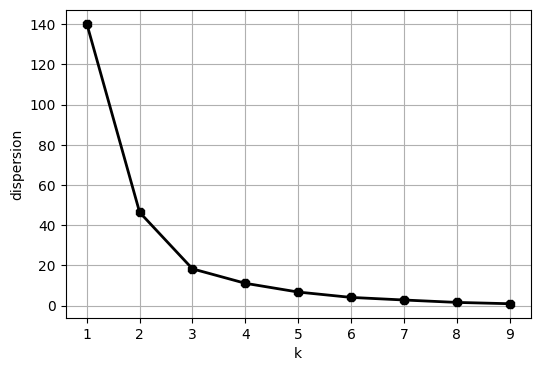

In [16]:
X2 = preprocessed_data.loc[:,['excess_travel_time','dwell_time']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color='black', marker='8')
plt.xlabel('k')
plt.ylabel("dispersion")
plt.show()

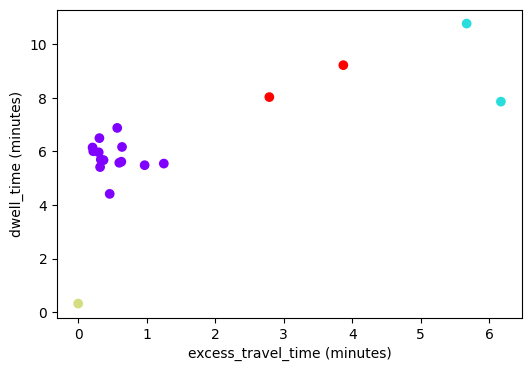

In [21]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X2)
plt.figure(figsize=(6,4))
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('excess_travel_time (minutes)')
plt.ylabel('dwell_time (minutes)')
#plt.savefig('excess_travel_dwell_time')
plt.show()

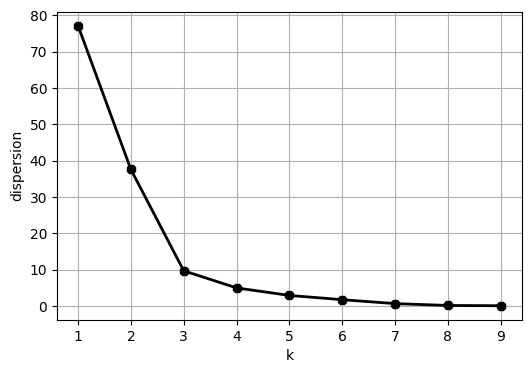

In [18]:
X3 = preprocessed_data.loc[:,['SITR','dwell_time']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color='black', marker='8')
plt.xlabel('k')
plt.ylabel("dispersion")
plt.show()

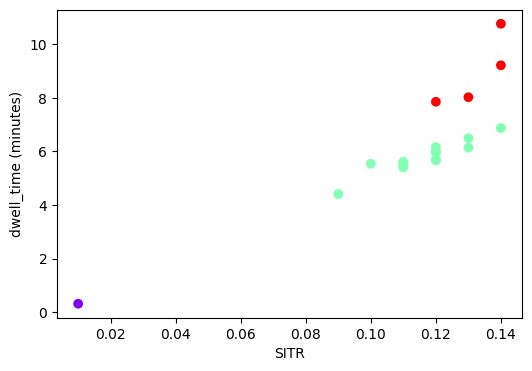

In [22]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X3)
plt.figure(figsize=(6,4))
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('SITR')
plt.ylabel('dwell_time (minutes)')
#plt.savefig('SITR_dwell_time')
plt.show()

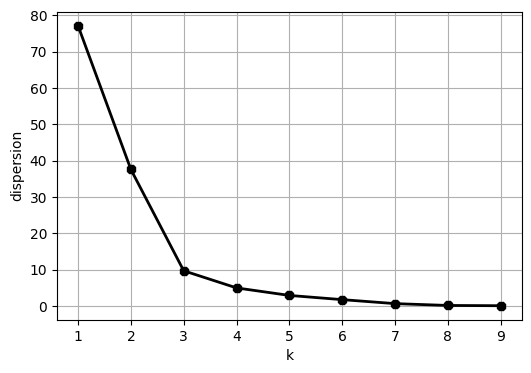

In [51]:
X4 = preprocessed_data.loc[:,['travel_time','excess_travel_time']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color='black', marker='8')
plt.xlabel('k')
plt.ylabel("dispersion")
plt.show()

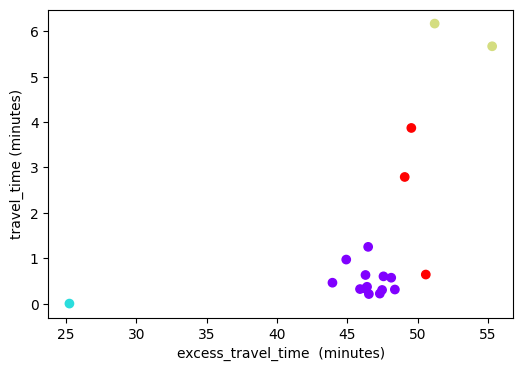

In [55]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X4)
plt.figure(figsize=(6,4))
plt.scatter(X4[:,0], X4[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('excess_travel_time  (minutes)')
plt.ylabel('travel_time (minutes)')
#plt.savefig('excess_travel_travel_time')
plt.show()